In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4)

In [6]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [7]:
kmeans.cluster_centers_

array([[177.83509615,  70.28846154],
       [ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [ 50.46127059,  32.42823529]])

In [8]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [9]:
import numpy as np

In [10]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [11]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 104, 1: 2775, 2: 696, 3: 425}

In [12]:
import seaborn as sns

In [13]:
data["cluster"] = kmeans.labels_

C:\Users\Devansh Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Devansh Gupta\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


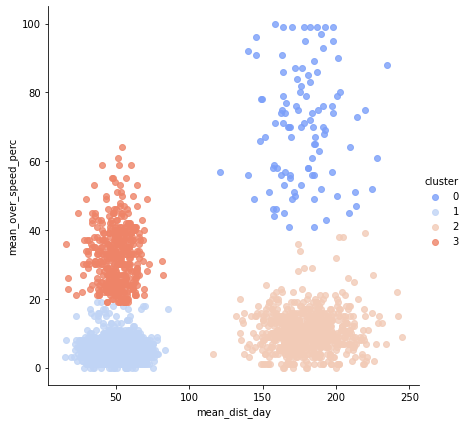

In [14]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [15]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

719601.538346904

In [16]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=4)>

In [17]:
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,3
3423313212,52.53,25,3
3423313724,64.54,27,3
3423311373,55.69,22,3
3423310999,54.58,25,3
...,...,...,...
3423310685,160.04,10,2
3423312600,176.17,5,2
3423312921,170.91,12,2
